In [ ]:
%matplotlib inline
import numpy as np
import cv2
from matplotlib import pyplot as plt
from skimage.morphology import extrema
from skimage.morphology import watershed as skwater
from google.colab import files
from IPython.display import Image
from google.colab.patches import cv2_imshow
from skimage import io
from PIL import Image

def ShowImage(title,img,ctype):
  plt.figure(figsize=(10, 10))
  if ctype=='bgr':
    b,g,r = cv2.split(img)       # get b,g,r
    rgb_img = cv2.merge([r,g,b])     # switch it to rgb
    plt.imshow(rgb_img)
  elif ctype=='hsv':
    rgb = cv2.cvtColor(img,cv2.COLOR_HSV2RGB)
    plt.imshow(rgb)
  elif ctype=='gray':
    plt.imshow(img,cmap='gray')
  elif ctype=='rgb':
    plt.imshow(img)
  else:
    raise Exception("Unknown colour type")
  plt.axis('off')
  plt.title(title)
  plt.show()

In [ ]:
input = files.upload()

Saving index.png to index.png


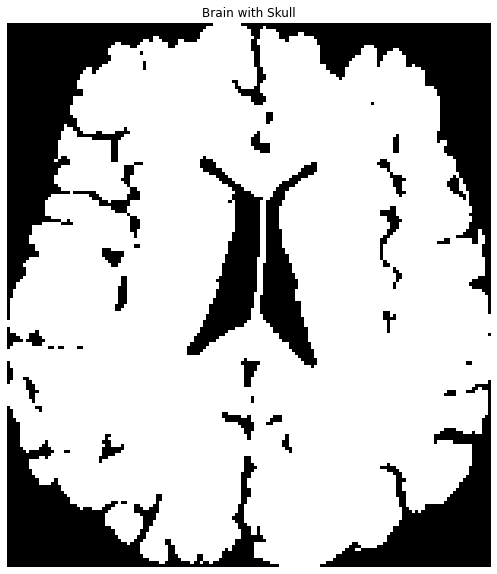

In [ ]:
img           = cv2.imread('index.png')
gray          = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ShowImage('Brain with Skull',gray,'gray')

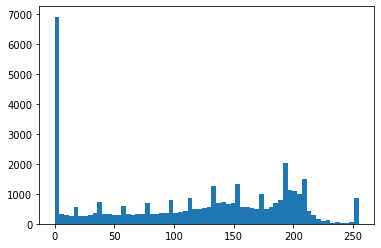

In [ ]:
#Make a histogram of the intensities in the grayscale image
plt.hist(gray.ravel(),64)
plt.show()

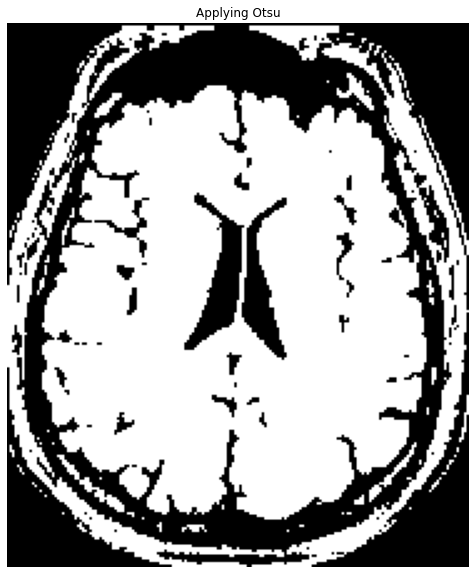

In [ ]:
#Threshold the image to binary using Otsu's method
ret, thresh = cv2.threshold(gray,10,255,cv2.THRESH_OTSU)
ShowImage('Applying Otsu',thresh,'gray')

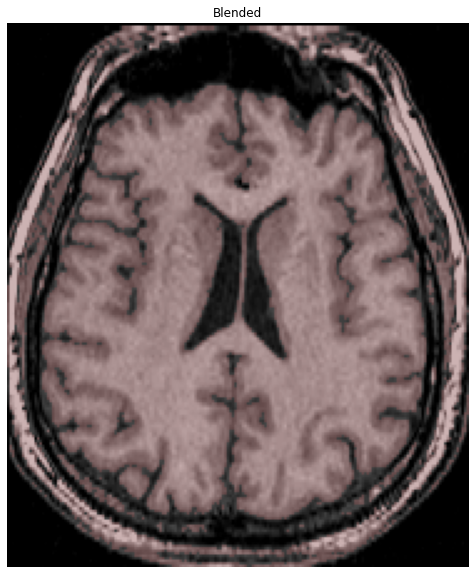

In [ ]:
colormask = np.zeros(img.shape, dtype=np.uint8)
colormask[thresh!=0] = np.array((0,0,255))
blended = cv2.addWeighted(img,0.7,colormask,0.1,0)
ShowImage('Blended', blended, 'bgr')

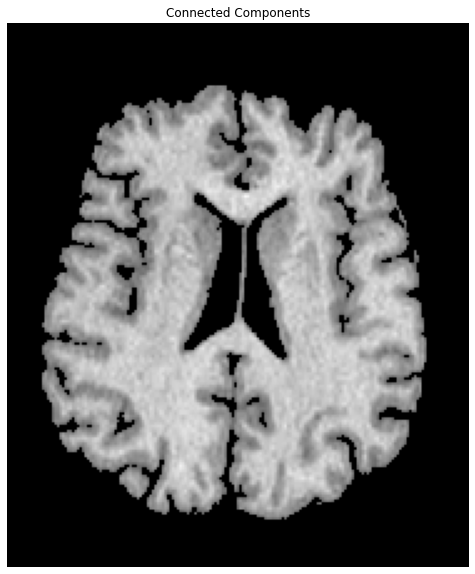

In [ ]:
ret, markers = cv2.connectedComponents(thresh)

#Get the area taken by each component. Ignore label 0 since this is the background.
marker_area = [np.sum(markers==m) for m in range(np.max(markers)) if m!=0]
#Get label of largest component by area
largest_component = np.argmax(marker_area)+1 #Add 1 since we dropped zero above
#Get pixels which correspond to the brain
brain_mask = markers==largest_component

brain_out = img.copy()
#In a copy of the original image, clear those pixels that don't correspond to the brain
brain_out[brain_mask==False] = (0,0,0)

ShowImage('Connected Components',brain_out,'rgb')

In [ ]:
im = Image.fromarray(brain_out)
im.save("brain_out.png")

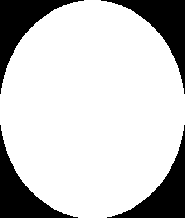

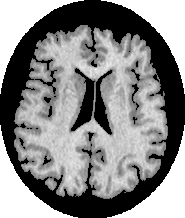

In [ ]:
from PIL import Image, ImageDraw, ImageOps
img=Image.open("brain_out.png")

height,width = img.size
lum_img = Image.new('L', [height,width] , 0)

draw = ImageDraw.Draw(lum_img)
draw.pieslice([(0,0), (height,width)], 0, 360,
              fill = 255, outline = "white")
img_arr =np.array(img)
lum_img_arr =np.array(lum_img)
display(Image.fromarray(lum_img_arr))
final_img_arr = np.dstack((img_arr,lum_img_arr))
im = Image.fromarray((final_img_arr))

display(im)


In [ ]:
#black and white
import cv2
#1st time run the next line
#grayImage = cv2.cvtColor(np.array(im1), cv2.COLOR_BGR2GRAY)
#grayImage = cv2.cvtColor(gray, cv2.COLOR_BGR2GRAY)
(thresh, blackAndWhiteImage) = cv2.threshold(grayImage, 127, 255, cv2.THRESH_BINARY)
cv2_imshow(blackAndWhiteImage)

NameError: ignored

In [ ]:
# importing libraries
import numpy as np

# reading the image data from desired directory

# counting the number of pixels
number_of_white_pix = np.sum(blackAndWhiteImage == 255)
number_of_black_pix = np.sum(blackAndWhiteImage == 0)

print('Number of white pixels:', number_of_white_pix)
print('Number of black pixels:', number_of_black_pix)

Number of white pixels: 19123
Number of black pixels: 7193
